# Análise cinemática de um mecanismo de 2 GDL: Mini Escavadeira
Alunos: Lucas Agatti Pacheco e Rosalvo João de Oliveira

In [1]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14,
    "figure.figsize": (8,6),
    "figure.dpi": 100,
    "figure.facecolor":'white'})

In [3]:
## Definindo as variaveis simbolicas
# Generalizadas e secundárias
q1, q2, A1, A2, t1, t2  = symbols('q_1 q_2 A_1 A_2 theta_1 theta_2')  
# Constantes do loop 1
Csx, Csy, Cl3, bl1 = symbols('C_{SX} C_{SY} C_{L3} beta_L1')
# Constantes do loop 2
Cl4, bl13, Cb2, bb12, Cl1 = symbols('C_{L4} beta_L13 C_{B2} beta_B12 C_{L1}')
# Constante para ponto de interesse
Cb1 = symbols("C_{B1}")


q1d, q2d, q1dd, q2dd = symbols('\dot{q_1} \dot{q_2} \ddot{q_1} \ddot{q_2}')
Ka11, Ka12, Ka21, Ka22, Kt11, Kt12, Kt21, Kt22 = symbols('K_{A11}, K_{A12}, K_{A21}, K_{A22}, K_{t11}, K_{t12}, K_{t21}, K_{t22}')
L1a11, L1a12, L1a21, L1a22, L2a11, L2a12, L2a21, L2a22 = symbols('L_{1A11} L_{1A12} L_{1A21} L_{1A22} L_{2A11} L_{2A12} L_{2A21} L_{2A22}')

# Para calculos com lambdify
q1ds, q2ds, q1dds, q2dds = symbols('q1d q2d q1dd q2dd')

# Ponto de interesse
# Up, Vp = symbols('U_p V_p')

# ## Definindo as funções simbólicas
A1q = Function('A_1')(q1,q2)
A2q = Function('A_2')(q1,q2)
t1q = Function('theta_1')(q1,q2)
t2q = Function('theta_2')(q1,q2)

Ka11q = Function('K_{A11}')(q1,q2)
Ka12q = Function('K_{A12}')(q1,q2)
Ka21q = Function('K_{A21}')(q1,q2)
Ka22q = Function('K_{A22}')(q1,q2)
Kt11q = Function('K_{t11}')(q1,q2)
Kt12q = Function('K_{t12}')(q1,q2)
Kt21q = Function('K_{t21}')(q1,q2)
Kt22q = Function('K_{t22}')(q1,q2)

In [4]:
# Valores das constantes
Csxv = 215.0
Csyv = 345.0
Cl1v = 2866
Cl3v = 1415.0
Cl4v = 1858.0
bl1v = np.radians(15.2)
bl13v = np.radians(15.2+12.0)
Cb1v = 1570
Cb2v = 432.0
bb12v = np.radians(77.0+73.0)
valores = [(Csx, Csxv), (Csy, Csyv), (Cl1, Cl1v), (Cl3, Cl3v), (Cl4, Cl4v), (bl1, bl1v), (bl13, bl13v), (Cb1, Cb1v), (Cb2, Cb2v), (bb12, bb12v)]


In [5]:
## Definindo as funções de loop e os vetores das variáveis:

f1 = Csx + q1*cos(t1) - Cl3*cos(A1+bl1)
f2 = q1*sin(t1) - Cl3*sin(A1+bl1) - Csy
f3 = Cl4*cos(A1+bl13) + q2*cos(t2) - Cb2*cos(A2 + bb12 - pi) - Cl1*cos(A1)
f4 = Cl4*sin(A1+bl13) - q2*sin(t2) - Cb2*sin(A2 + bb12 - pi) - Cl1*sin(A1)

F = Matrix([f1, f2, f3, f4])
S = Matrix([A1, A2, t1, t2])
q = Matrix([q1, q2])
qd = Matrix([q1d, q2d])
qdd = Matrix([q1dd, q2dd])

display(F, S, q, qd, qdd)


Matrix([
[                                      -C_{L3}*cos(A_1 + beta_L1) + C_{SX} + q_1*cos(theta_1)],
[                                      -C_{L3}*sin(A_1 + beta_L1) - C_{SY} + q_1*sin(theta_1)],
[C_{B2}*cos(A_2 + beta_B12) - C_{L1}*cos(A_1) + C_{L4}*cos(A_1 + beta_L13) + q_2*cos(theta_2)],
[C_{B2}*sin(A_2 + beta_B12) - C_{L1}*sin(A_1) + C_{L4}*sin(A_1 + beta_L13) - q_2*sin(theta_2)]])

Matrix([
[    A_1],
[    A_2],
[theta_1],
[theta_2]])

Matrix([
[q_1],
[q_2]])

Matrix([
[\dot{q_1}],
[\dot{q_2}]])

Matrix([
[\ddot{q_1}],
[\ddot{q_2}]])

## Análise da velocidade

$\{\dot{S}\} = [J]^{-1}[b]\{\dot{q}\}$

$\{\dot{S}\} = [K]\{\dot{q}\}$

In [6]:
# Análise de velocidade:
J = F.jacobian(S)
b = - F.jacobian(q)

display(J,b)

Matrix([
[                    C_{L3}*sin(A_1 + beta_L1),                           0, -q_1*sin(theta_1),                 0],
[                   -C_{L3}*cos(A_1 + beta_L1),                           0,  q_1*cos(theta_1),                 0],
[ C_{L1}*sin(A_1) - C_{L4}*sin(A_1 + beta_L13), -C_{B2}*sin(A_2 + beta_B12),                 0, -q_2*sin(theta_2)],
[-C_{L1}*cos(A_1) + C_{L4}*cos(A_1 + beta_L13),  C_{B2}*cos(A_2 + beta_B12),                 0, -q_2*cos(theta_2)]])

Matrix([
[-cos(theta_1),             0],
[-sin(theta_1),             0],
[            0, -cos(theta_2)],
[            0,  sin(theta_2)]])

In [11]:
# Código mais rápido na célula abaixo
# K = simplify(J.inv()*b)

# display(K)

In [7]:
# Calculo da matriz de coeficientes de velocidade de forma desacoplada
k1 = simplify(J[[0,1],[0,2]].inv()*b[:2,0])
b2 = (-J[[2,3],0]).row_join(b[[2,3],1])
k21 = simplify(J[[2,3],[1,3]].inv()*(-J[[2,3],0])*k1[0])
k22 = simplify(J[[2,3],[1,3]].inv()*b[[2,3],1])
K = Matrix([[k1[0],0],[k21[0],k22[0]], [k1[1],0],[k21[1],k22[1]]])
K

Matrix([
[                                                                                                                 -1/(C_{L3}*sin(A_1 + beta_L1 - theta_1)),                                        0],
[           (-C_{L1}*sin(A_1 + theta_2) + C_{L4}*sin(A_1 + beta_L13 + theta_2))/(C_{B2}*C_{L3}*sin(A_1 + beta_L1 - theta_1)*sin(A_2 + beta_B12 + theta_2)), 1/(C_{B2}*sin(A_2 + beta_B12 + theta_2))],
[                                                                                                                    -1/(q_1*tan(A_1 + beta_L1 - theta_1)),                                        0],
[(C_{L1}*sin(-A_1 + A_2 + beta_B12) + C_{L4}*sin(A_1 - A_2 - beta_B12 + beta_L13))/(C_{L3}*q_2*sin(A_1 + beta_L1 - theta_1)*sin(A_2 + beta_B12 + theta_2)),    1/(q_2*tan(A_2 + beta_B12 + theta_2))]])

## Análise da aceleração

$\{\ddot{S}\} = [K]\{\ddot{q}\} + ([L_1]\dot{q_1} + [L_2]\dot{q_2})\{\dot{q}\}$

$[L_1] = \frac{\partial [K]}{\partial q_1}$

$[L_2] = \frac{\partial [K]}{\partial q_2}$

In [8]:
# Análise de aceleração
Kl = K.subs([(A1, A1q), (A2, A2q), (t1, t1q), (t2, t2q)])
display(Kl)

Matrix([
[                                                                                                                                                                            -1/(C_{L3}*sin(beta_L1 + A_1(q_1, q_2) - theta_1(q_1, q_2))),                                                            0],
[          (-C_{L1}*sin(A_1(q_1, q_2) + theta_2(q_1, q_2)) + C_{L4}*sin(beta_L13 + A_1(q_1, q_2) + theta_2(q_1, q_2)))/(C_{B2}*C_{L3}*sin(beta_B12 + A_2(q_1, q_2) + theta_2(q_1, q_2))*sin(beta_L1 + A_1(q_1, q_2) - theta_1(q_1, q_2))), 1/(C_{B2}*sin(beta_B12 + A_2(q_1, q_2) + theta_2(q_1, q_2)))],
[                                                                                                                                                                               -1/(q_1*tan(beta_L1 + A_1(q_1, q_2) - theta_1(q_1, q_2))),                                                            0],
[(C_{L1}*sin(beta_B12 - A_1(q_1, q_2) + A_2(q_1, q_2)) - C_{L4}*sin(beta_B12 - beta_L13 - A_1(q_1

In [9]:
L1 = Kl.diff(q1)
L1 = L1.subs([(diff(A1q,q1), Ka11), (diff(A2q,q1), Ka21), (diff(t1q,q1), Kt11), (diff(t2q,q1), Kt21)])
L1 = L1.subs([(A1q, A1), (A2q, A2), (t1q, t1), (t2q, t2)])
L1 = L1.subs([(Ka12, 0), (Kt12, 0)])


L2 = Kl.diff(q2)
L2 = L2.subs([(diff(A1q,q2), Ka12), (diff(A2q,q2), Ka22), (diff(t1q,q2), Kt12), (diff(t2q,q2), Kt22)])
L2 = L2.subs([(A1q, A1), (A2q, A2), (t1q, t1), (t2q, t2)])
L2 = L2.subs([(Ka12, 0), (Kt12, 0)])


display(L1,L2)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            (K_{A11} - K_{t11})*cos(A_1 + beta_L1 - theta_1)/(C_{L3}*sin(A_1 + beta_L1 - theta_1)**2),                                                                                                  0],
[                                   -(K_{A11} - K_{t11})*(-C_{L1}*sin(A_1 + theta_2) + C_{L4}*sin(A_1 + beta_L13 + theta_2))*cos(A_1 + beta_L1 - theta_1)/(C_{B2}*C_{L3}*sin(A_1 + beta_L1 - theta_1)**2*sin(A_2 + beta_B12 + theta_2)) - (K_{A21} + K_{t21})*(-C_{L1}*sin(A_1 + t

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0,                                                                                                                                             0],
[                                                                                                                                                                                     -(K_{A22} + K_{t22})*(-C_{L1}*sin(A_1 + theta_2) + C_{L4}*sin(A_1 + beta_L13 + theta_2))*cos(A_2 + beta_B12 + theta_2)/(C_{B

# Análise de ponto de interesse:

In [10]:
Xp = Cl1*cos(A1q) - Cb1*cos(A2q)
Yp = Cl1*sin(A1q) - Cb1*sin(A2q)

P = Matrix([Xp,Yp])

display(P)

Matrix([
[-C_{B1}*cos(A_2(q_1, q_2)) + C_{L1}*cos(A_1(q_1, q_2))],
[-C_{B1}*sin(A_2(q_1, q_2)) + C_{L1}*sin(A_1(q_1, q_2))]])

In [11]:
# Velocidade do ponto de interesse
# Kp = P.jacobian(q).subs([(Aq.diff(q1),Ka1), (Aq.diff(q2),Ka2)]).subs([(Aq,A), (Bq, B)])
Kp = P.jacobian(q).subs([(diff(A1q,q1), Ka11), (diff(A1q,q2), Ka12), (diff(A2q,q1), Ka21), (diff(A2q,q2), Ka22)]).subs([(A1q,A1), (A2q, A2)])

display(Kp)

Matrix([
[ C_{B1}*K_{A21}*sin(A_2) - C_{L1}*K_{A11}*sin(A_1),  C_{B1}*K_{A22}*sin(A_2) - C_{L1}*K_{A12}*sin(A_1)],
[-C_{B1}*K_{A21}*cos(A_2) + C_{L1}*K_{A11}*cos(A_1), -C_{B1}*K_{A22}*cos(A_2) + C_{L1}*K_{A12}*cos(A_1)]])

In [13]:
Kpl = Kp.subs([(Ka11, Ka11q), (Ka12, Ka12q), (Ka21, Ka21q), (Ka22, Ka22q), (A1,A1q), (A2, A2q)])
Lp1 = Kpl.diff(q1).subs([(Ka11q.diff(q1),L1a11), (Ka12q.diff(q1),L1a12), (Ka21q.diff(q1),L1a21), (Ka22q.diff(q1),L1a22)])
Lp1 = Lp1.subs([(diff(A1q,q1), Ka11), (diff(A2q,q1), Ka21)]).subs([(Ka11q, Ka11), (Ka12q, Ka12), (Ka21q, Ka21), (Ka22q, Ka22),(A1q,A1), (A2q, A2)])


Lp2 = Kpl.diff(q2).subs([(Ka11q.diff(q2),L2a11), (Ka12q.diff(q2),L2a12), (Ka21q.diff(q2),L2a21), (Ka22q.diff(q2),L2a22)])
Lp2 = Lp2.subs([(diff(A1q,q2), Ka12), (diff(A2q,q2), Ka22)]).subs([(Ka11q, Ka11), (Ka12q, Ka12), (Ka21q, Ka21), (Ka22q, Ka22),(A1q,A1), (A2q, A2)])

display(Lp1)
display(Lp2)


Matrix([
[C_{B1}*K_{A21}**2*cos(A_2) + C_{B1}*L_{1A21}*sin(A_2) - C_{L1}*K_{A11}**2*cos(A_1) - C_{L1}*L_{1A11}*sin(A_1), C_{B1}*K_{A21}*K_{A22}*cos(A_2) + C_{B1}*L_{1A22}*sin(A_2) - C_{L1}*K_{A11}*K_{A12}*cos(A_1) - C_{L1}*L_{1A12}*sin(A_1)],
[C_{B1}*K_{A21}**2*sin(A_2) - C_{B1}*L_{1A21}*cos(A_2) - C_{L1}*K_{A11}**2*sin(A_1) + C_{L1}*L_{1A11}*cos(A_1), C_{B1}*K_{A21}*K_{A22}*sin(A_2) - C_{B1}*L_{1A22}*cos(A_2) - C_{L1}*K_{A11}*K_{A12}*sin(A_1) + C_{L1}*L_{1A12}*cos(A_1)]])

Matrix([
[C_{B1}*K_{A21}*K_{A22}*cos(A_2) + C_{B1}*L_{2A21}*sin(A_2) - C_{L1}*K_{A11}*K_{A12}*cos(A_1) - C_{L1}*L_{2A11}*sin(A_1), C_{B1}*K_{A22}**2*cos(A_2) + C_{B1}*L_{2A22}*sin(A_2) - C_{L1}*K_{A12}**2*cos(A_1) - C_{L1}*L_{2A12}*sin(A_1)],
[C_{B1}*K_{A21}*K_{A22}*sin(A_2) - C_{B1}*L_{2A21}*cos(A_2) - C_{L1}*K_{A11}*K_{A12}*sin(A_1) + C_{L1}*L_{2A11}*cos(A_1), C_{B1}*K_{A22}**2*sin(A_2) - C_{B1}*L_{2A22}*cos(A_2) - C_{L1}*K_{A12}**2*sin(A_1) + C_{L1}*L_{2A12}*cos(A_1)]])

# Análise de posição

In [15]:
# Funções para realizar a análise cinemática
def newtonR(F,iJ,q,A0,t0,tolmax, maxiter):
    tol = np.linalg.norm(F(A0,t0,q))
    x0 = np.array([A0,t0])
    iter = 1
    while tol > tolmax and iter <= maxiter:
        x = x0 - np.matmul(iJ(x0[0],x0[1],q),F(x0[0],x0[1],q)).flatten()

        tol = np.linalg.norm(F(x0[0],x0[1],q))
        iter = iter + 1
        x0 = x
    A = x0[0]
    t = x0[1]
    return A, t

def analisecinematica(q,qp,qpp,N,S0,F1,iJ1,F2,iJ2,Kf,L1f,L2f,Pf,Kpf,Lp1f,Lp2f):
    tolmax = 0.005
    maxiter = 20

    S = np.zeros((N,4))
    Sp = np.zeros((N,4))
    Spp = np.zeros((N,4))
    P = np.zeros((N,2))
    Pp = np.zeros((N,2))
    Ppp = np.zeros((N,2))

    for i in range(N):
        # Posição das secundárias
        S[i,0], S[i,1] = newtonR(F1,iJ1,q[i,0],S0[0], S0[1],tolmax, maxiter)

        F2f = lambda A2, t2, q2: F2(A2,t2,q2,S[i,0])
        S[i,2], S[i,3] = newtonR(F2f,iJ2,q[i,1],S0[2], S0[3],tolmax, maxiter)
        
        S0 = S[i,:]
        
        # Velocidade das secundárias
        K = Kf(S[i,0],S[i,1],S[i,2],S[i,3],q[i,0],q[i,1]);
        Sp[i,:] = np.matmul(K,q[i,:])

        # Aceleração das secundárias
        L1 = L1f(S[i,0],S[i,1],S[i,2],S[i,3],q[i,0],q[i,1],K[0,0],K[0,1],K[1,0],K[1,1],K[2,0],K[2,1],K[3,0],K[3,1])
        L2 = L2f(S[i,0],S[i,1],S[i,2],S[i,3],q[i,0],q[i,1],K[0,0],K[0,1],K[1,0],K[1,1],K[2,0],K[2,1],K[3,0],K[3,1])
        Spp[i,:] = np.matmul(K,qpp[i,:]) + np.matmul((L1*qp[i,0] + L2*qp[i,1]),qp[i,:])


        # # Posição do ponto de interesse
        P[i,:] = Pf(S[i,0],S[i,2]).flatten();

        # Velocidade do ponto de interesse
        Kp = Kpf(S[i,0],S[i,2],K[0,0],K[0,1],K[1,0],K[1,1])
        Pp[i,:] = np.matmul(Kp,qp[i,:])

        # Aceleração do ponto de interesse
        Lp1 = Lp1f(S[i,0],S[i,2],K[0,0],K[0,1],K[1,0],K[1,1],L1[0,0],L1[0,1],L1[1,0],L1[1,1])
        Lp2 = Lp2f(S[i,0],S[i,2],K[0,0],K[0,1],K[1,0],K[1,1],L2[0,0],L2[0,1],L2[1,0],L2[1,1])
        Ppp[i,:] = np.matmul(Kp,qpp[i,:]) + np.matmul((Lp1*qp[i,0] + Lp2*qp[i,1]),qp[i,:])

    return S, Sp, Spp, P, Pp, Ppp

In [16]:
# Transformando as expressões simbólicas em funções
iJ1 = lambdify((A1,t1,q1),simplify(J[[0,1],[0,2]].inv()).subs(valores),'numpy')
F1 = lambdify((A1,t1,q1), Matrix(F[:2]).subs(valores),'numpy')
iJ2 = lambdify((A2,t2,q2),simplify(J[[2,3],[1,3]].inv()).subs(valores),'numpy')
F2 = lambdify((A2,t2,q2,A1), Matrix(F[2:]).subs(valores),'numpy')
Kf = lambdify((A1,t1,A2,t2,q1,q2),K.subs(valores),'numpy')
L1f = lambdify((A1,t1,A2,t2,q1,q2,Ka11,Ka12,Ka21,Ka22,Kt11,Kt12,Kt21,Kt22), L1.subs(valores),'numpy')
L2f = lambdify((A1,t1,A2,t2,q1,q2,Ka11,Ka12,Ka21,Ka22,Kt11,Kt12,Kt21,Kt22), L2.subs(valores),'numpy')

# Ponto de interesse
Pf = lambdify((A1q,A2q),P.subs(valores),'numpy')
Kpf = lambdify((A1,A2,Ka11,Ka12,Ka21,Ka22),Kp.subs(valores),'numpy')
Lp1f = lambdify((A1,A2,Ka11,Ka12,Ka21,Ka22,L1a11, L1a12,L1a21,L1a22),Lp1.subs(valores),'numpy')
Lp2f = lambdify((A1,A2,Ka11,Ka12,Ka21,Ka22,L2a11, L2a12,L2a21,L2a22),Lp2.subs(valores),'numpy')

In [17]:
# código para visualição das posições 
def calculaposicao(q1,q2):
    tolmax = 0.005
    maxiter = 20
    A10 = 0.0
    A20 = np.radians(37)
    t10 = np.pi/6
    t20 = np.radians(27)
    A1v, t1v = newtonR(F1,iJ1,q1,A10, t10,tolmax, maxiter)
    # fvalor[i,:] = F1(A1v[i],t1v[i],q[i]).flatten()
    F2f = lambda A2, t2, q2: F2(A2,t2,q2,A1v)
    A2v, t2v = newtonR(F2f,iJ2,q2,A20, t20,tolmax, maxiter)

    return np.array([A1v, A2v, t1v, t2v])

def plotamecanismo(A1,A2,t1,t2,q1,q2,Cl1,Cl4,Csx,Csy,bl13,Cb1):
    p0 = [0,0]
    p1 = [Cl1*np.cos(A1), Cl1*np.sin(A1)]
    p2 = [Csx, - Csy]
    p3 = [p2[0] + q1*np.cos(t1), p2[1] + q1*np.sin(t1)]
    p4 = [Cl4*np.cos(A1+bl13), + Cl4*np.sin(A1+bl13)]
    p5 = [p4[0]+ q2*np.cos(t2), p4[1]-q2*np.sin(t2)]
    p6 = [p1[0] - Cb1*np.cos(A2),p1[1]-Cb1*np.sin(A2)]

    barra1 = np.array([p0,p1])
    barra2 = np.array([p2,p3])
    barra3 = np.array([p0,p4])
    barra4 = np.array([p4,p5])
    barra5 = np.array([p1,p6])

    plt.plot(barra1[:,0],barra1[:,1], label = "CL1")
    plt.plot(barra2[:,0],barra2[:,1], label = "q1")
    plt.plot(barra3[:,0],barra3[:,1], label = "CL4")
    plt.plot(barra4[:,0],barra4[:,1], label = "q2")
    plt.plot(barra5[:,0],barra5[:,1], label = "CB1")
    plt.legend(loc="lower left")
    plt.show()



In [18]:
# Pacotes para permitir interatividade
from ipywidgets import interact
import ipywidgets as ip

In [21]:
def interativo(q1,q2, Cl1,Cl4,Csx,Csy,bl13,Cb1):
    S = calculaposicao(q1,q2)
    plotamecanismo(S[0],S[1],S[2],S[3],q1,q2,Cl1,Cl4,Csx,Csy,bl13,Cb1)

interact(interativo, q1=(1100,1900,10), q2 = (1100,1900,10), Cl1=ip.fixed(Cl1v), Cl4=ip.fixed(Cl4v),Csx=ip.fixed(Csxv),Csy=ip.fixed(Csyv),bl13=ip.fixed(bl13v),Cb1=ip.fixed(Cb1v));

interactive(children=(IntSlider(value=1500, description='q1', max=1900, min=1100, step=10), IntSlider(value=15…

In [22]:
# Funções para fazer plots
def plotabonito(t,S,legenda,eixox,eixoy):
    fig, ax = plt.subplots()  # Create a figure and an axes.
    n = np.shape(S)[1]

    for i in range(n):
        ax.plot(t, S[:,i], label=legenda[i])  # Plot some data on the axes.
        

    ax.set_xlabel(eixox)  # Add an x-label to the axes.
    ax.set_ylabel(eixoy)  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.grid()
    ax.legend()  # Add a legend.
    return fig, ax

def plotaesalvatudo(t,qv,qpv,qppv,S,Sp,Spp,P,Pp,Ppp,tipo):
    legenda = ["$A_1$", "$\\theta_1$", "$A_2$", "$\\theta_2$"]
    eixox = "Tempo (s)"
    eixoy = "Posição Secundárias (graus)"
    fig, ax = plotabonito(t,np.degrees(S),legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/PosSec_"+tipo+".png")

    legenda = ["$\\dot{A_1}$", "$\\dot{\\theta_1}$", "$\\dot{A_2}$", "$\\dot{\\theta_2}$"]
    eixox = "Tempo (s)"
    eixoy = "Velocidades Secundárias (graus/s)"
    fig, ax = plotabonito(t,np.degrees(Sp),legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/VelSec_"+tipo+".png")

    legenda = ["$\\ddot{A_1}$", "$\\ddot{\\theta_1}$", "$\\ddot{A_2}$", "$\\ddot{\\theta_2}$"]
    eixox = "Tempo (s)"
    eixoy = "Acelerações Secundárias (graus/$\\mathrm{s}^2$)"
    fig, ax = plotabonito(t,np.degrees(Spp),legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/AcelSec_"+tipo+".png")

    legenda = ["$q_1$", "$q_2$"]
    eixox = "Tempo (s)"
    eixoy = "Posição Generalizadas (mm)"
    fig, ax = plotabonito(t,qv,legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/PosGen_"+tipo+".png")

    legenda = ["$\\dot{q_1}$", "$\\dot{q_2}$"]
    eixox = "Tempo (s)"
    eixoy = "Velocidade Generalizadas (mm/s)"
    fig, ax = plotabonito(t,qpv,legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/VelGen_"+tipo+".png")

    legenda = ["$\\ddot{q_1}$", "$\\ddot{q_2}$"]
    eixox = "Tempo (s)"
    eixoy = "Aceleração Generalizadas (mm/$\\mathrm{s}^2$)"
    fig, ax = plotabonito(t,qppv,legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/AcelGen_"+tipo+".png")

    legenda = ["$X_P$", "$Y_P$"]
    eixox = "Tempo (s)"
    eixoy = "Posição PI (mm)"
    fig, ax = plotabonito(t,P,legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/PosPI_"+tipo+".png")

    legenda = ["$\\dot{X_P}$", "$\\dot{Y_P}$"]
    eixox = "Tempo (s)"
    eixoy = "Velocidade PI (mm/s)"
    fig, ax = plotabonito(t,Pp,legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/VelPI_"+tipo+".png")

    legenda = ["$\\ddot{X_P}$", "$\\ddot{Y_P}$"]
    eixox = "Tempo (s)"
    eixoy = "Aceleração PI (mm/$\\mathrm{s}^2$)"
    fig, ax = plotabonito(t,Ppp,legenda,eixox,eixoy)
    plt.savefig("./imagens/"+tipo+"/AcelPI_"+tipo+".png")


# Análise cinemática linear

$\ddot{q} = 0$

In [35]:
ti = 0 #segundos
tf = 10 #segundos
N = 200

qi1 = 1350
qf1 = 1800
qi2 = 1900
qf2 = 1150

q10 = qi1
qp10 = (qf1-qi1)/((tf-ti)/2) 
qpp10 = 0
q1v = np.concatenate((np.linspace(qi1,qf1,100),np.linspace(qf1,qi1,100)))
qp1v = np.concatenate((qp10*np.ones(100),-qp10*np.ones(100)))
qpp1v = qpp10*np.ones(N)

q20 = qi2
qp20 = (qf2-qi2)/((tf-ti)/2) 
qpp20 = 0
q2v = np.concatenate((np.linspace(qi2,qf2,100),np.linspace(qf2,qi2,100)))
qp2v = np.concatenate((qp20*np.ones(100),-qp20*np.ones(100)))
qpp2v = qpp20*np.ones(N)

t = np.linspace(ti,tf,N)
qv = np.stack((q1v,q2v),axis=1)
qpv = np.stack((qp1v,qp2v),axis=1)
qppv = np.stack((qpp1v,qpp2v),axis=1)



In [36]:
# S é um vetor com entradas:
# S = [A1, t1, A2, t2]
S0 = np.array([0.0, np.pi/6, np.radians(37), np.radians(27)])
S, Sp, Spp, P, Pp, Ppp = analisecinematica(qv,qpv,qppv,N,S0,F1,iJ1,F2,iJ2,Kf,L1f,L2f,Pf,Kpf,Lp1f,Lp2f)

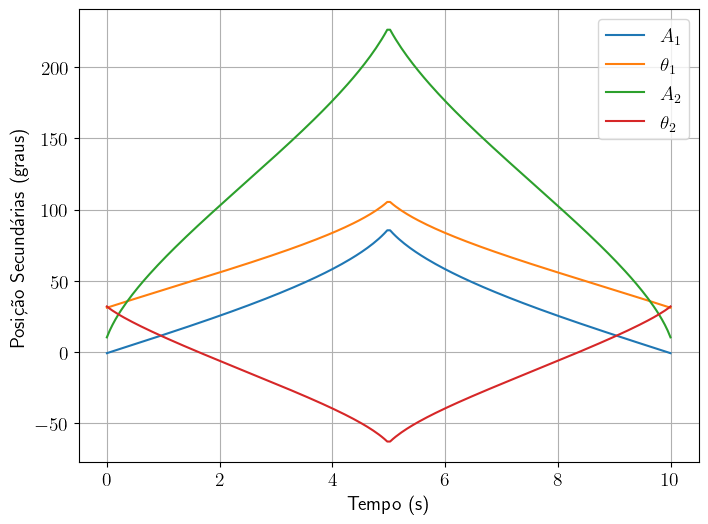

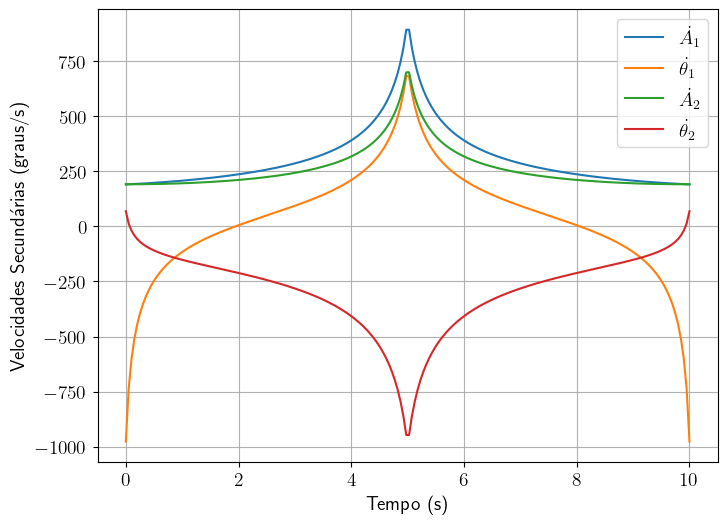

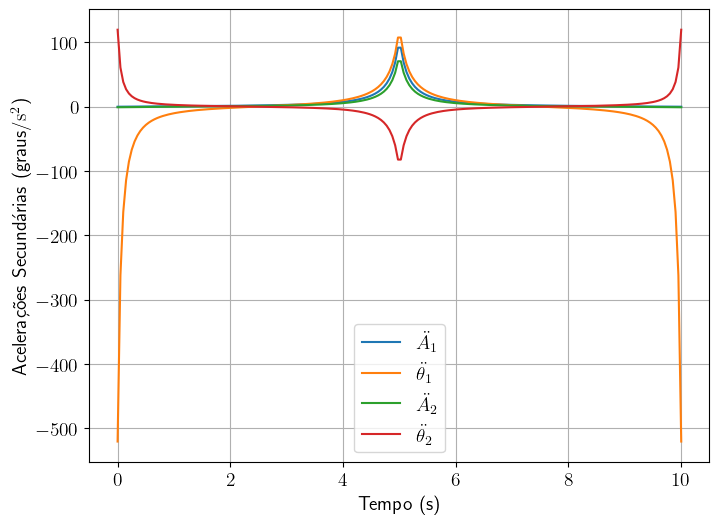

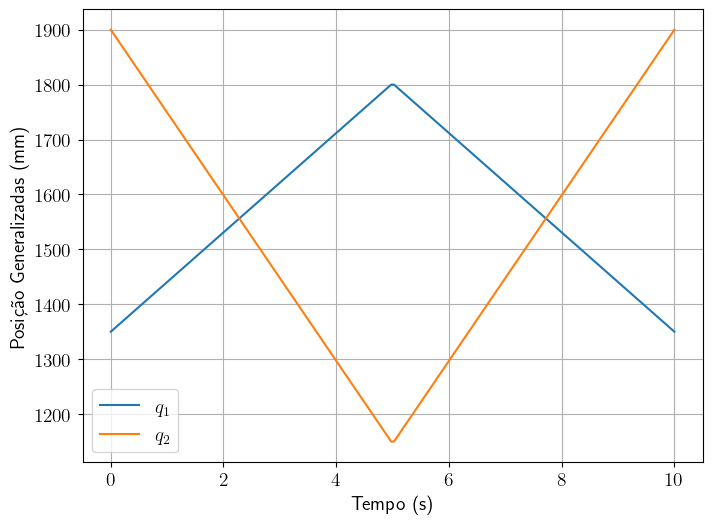

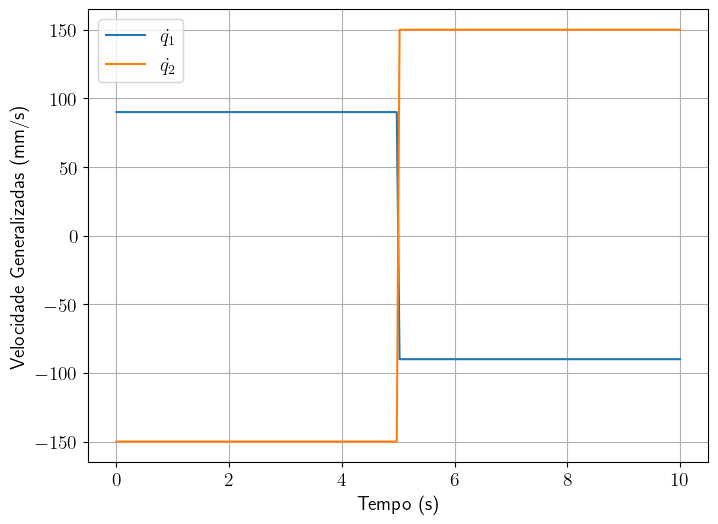

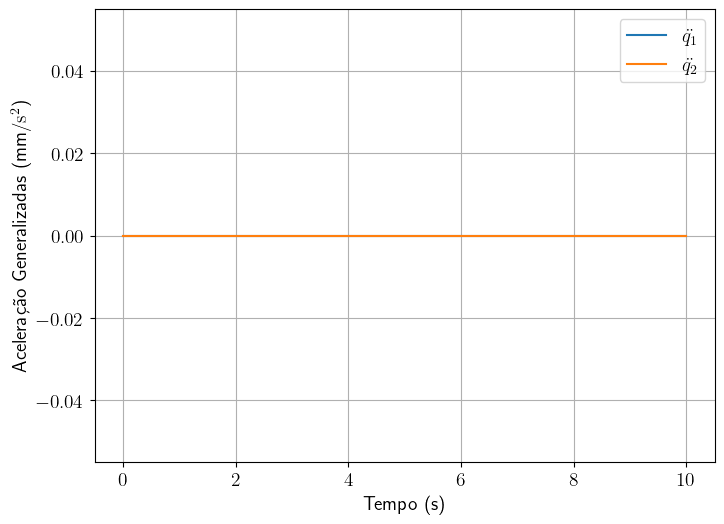

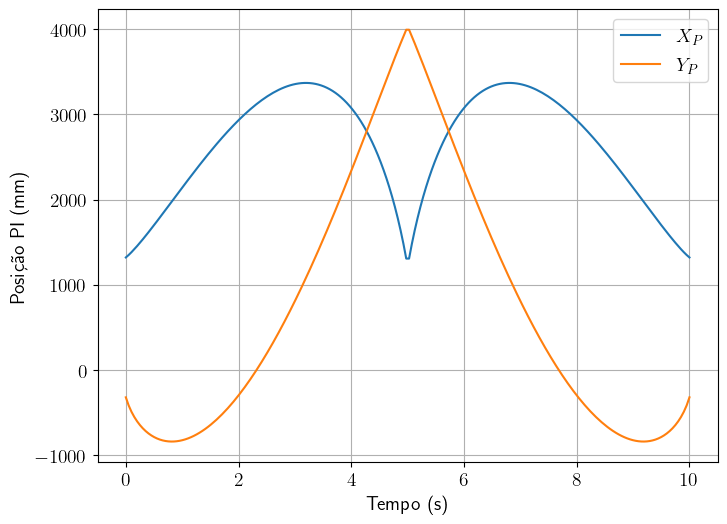

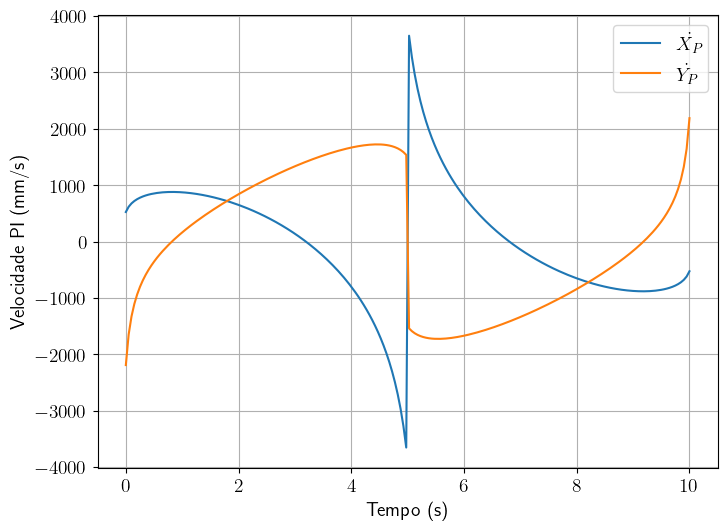

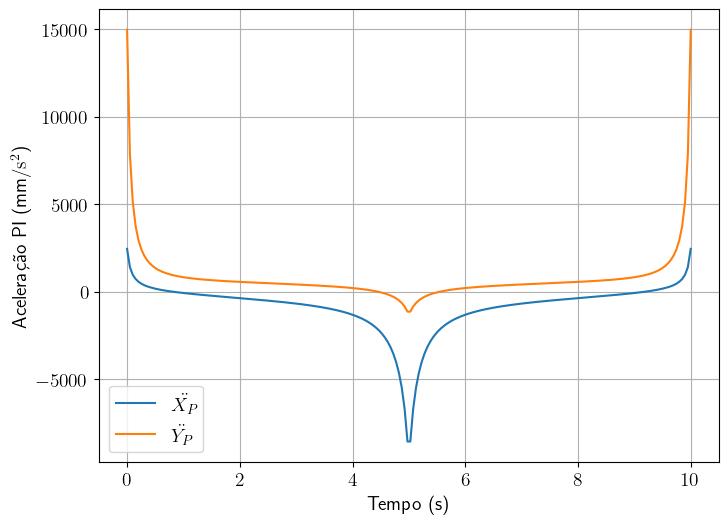

In [37]:
plotaesalvatudo(t,qv,qpv,qppv,S,Sp,Spp,P,Pp,Ppp,"linear")

# Análise cinemática Quadrática

$\ddot{q} = constante$

In [38]:
ti = 0; #segundos
tf = 10; #segundos
N = 200;

qi1 = 1350
qf1 = 1800
qi2 = 1900
qf2 = 1150


q10 = qi1
a1 = -4*(qf1 - q10)/((ti-tf)**2);
qpp10 = 2*a1;
qp10 = -a1*(ti+tf);

q20 = qi2
a2 = -4*(qf2 - q20)/((ti-tf)**2);
qpp20 = 2*a2;
qp20 = -a2*(ti+tf);

t = np.linspace(ti,tf,N);
q1v = np.zeros(N);
qp1v = np.zeros(N);
qpp1v = qpp10*np.ones(N);

q2v = np.zeros(N);
qp2v = np.zeros(N);
qpp2v = qpp20*np.ones(N);

q1v[0] = q10
qp1v[0] = qp10
q2v[0] = q20
qp2v[0] = qp20
 
for i in range(1,N):
      qp1v[i] = qp10 + qpp1v[i-1]*t[i]
      q1v[i] = q10 + qp10*t[i] + (qpp1v[i-1]*(t[i]**2))/2

      qp2v[i] = qp20 + qpp2v[i-1]*t[i]
      q2v[i] = q20 + qp20*t[i] + (qpp2v[i-1]*(t[i]**2))/2

qv = np.stack((q1v,q2v),axis=1)
qpv = np.stack((qp1v,qp2v),axis=1)
qppv = np.stack((qpp1v,qpp2v),axis=1)

In [39]:
# S é um vetor com entradas:
# S = [A1, t1, A2, t2]
S0 = np.array([0.0, np.pi/6, np.radians(37), np.radians(27)])
S, Sp, Spp, P, Pp, Ppp = analisecinematica(qv,qpv,qppv,N,S0,F1,iJ1,F2,iJ2,Kf,L1f,L2f,Pf,Kpf,Lp1f,Lp2f)

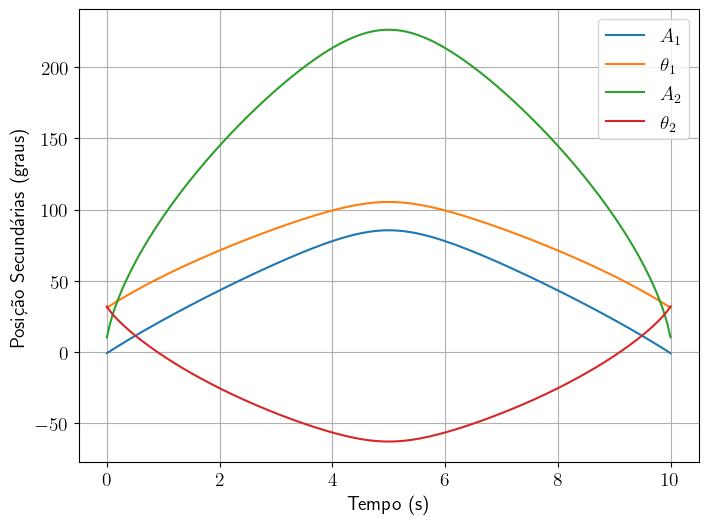

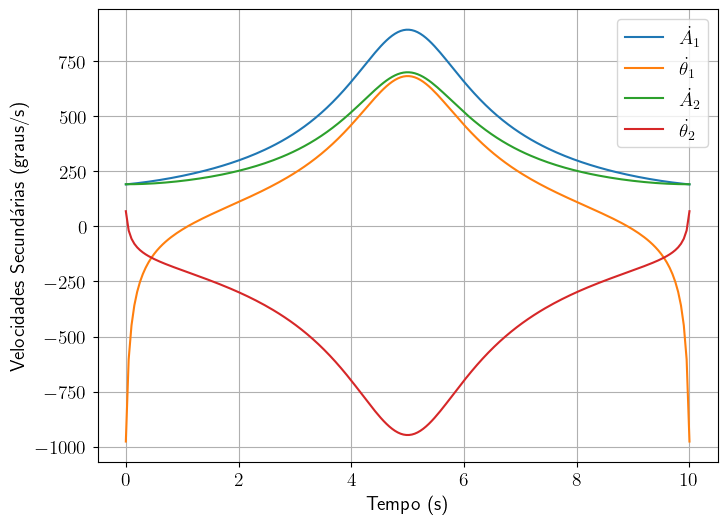

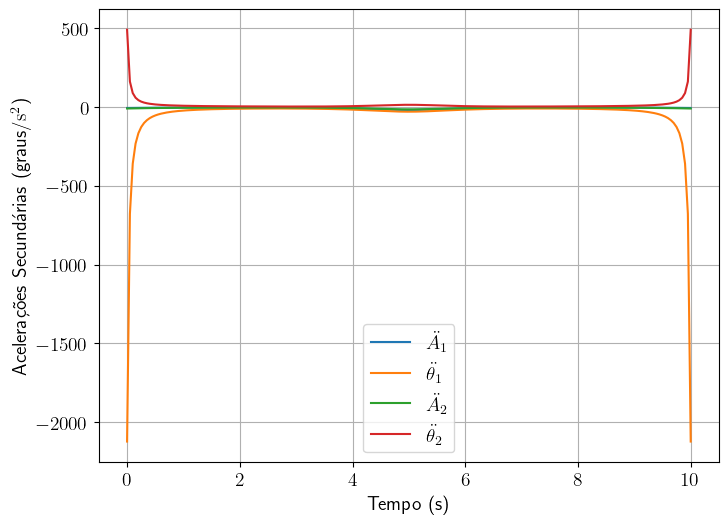

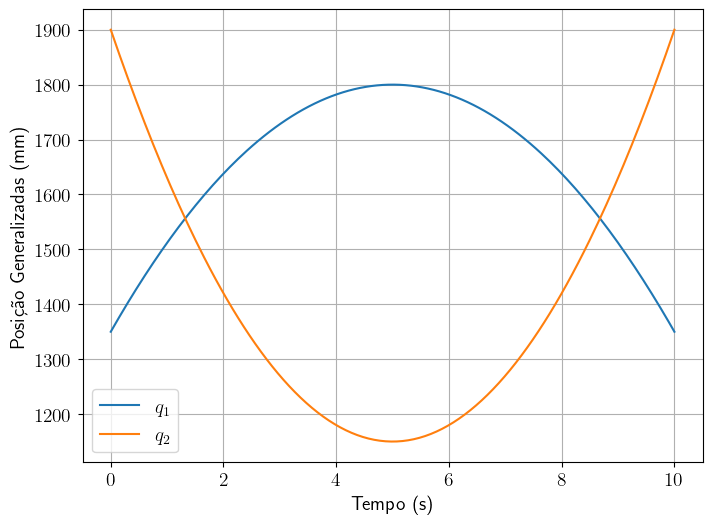

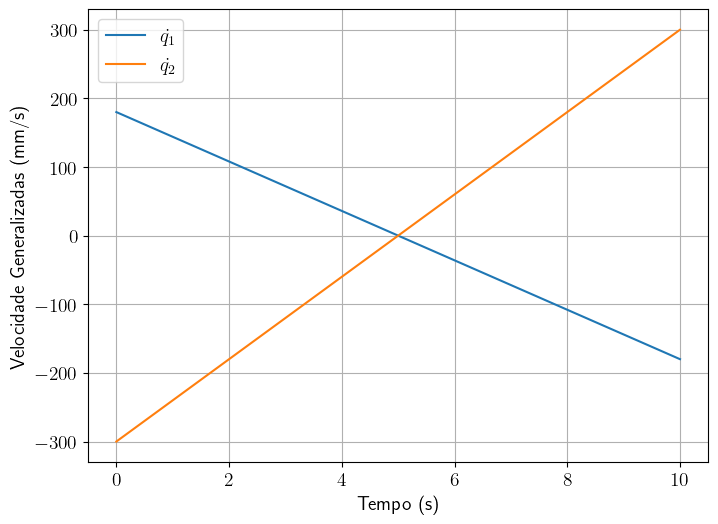

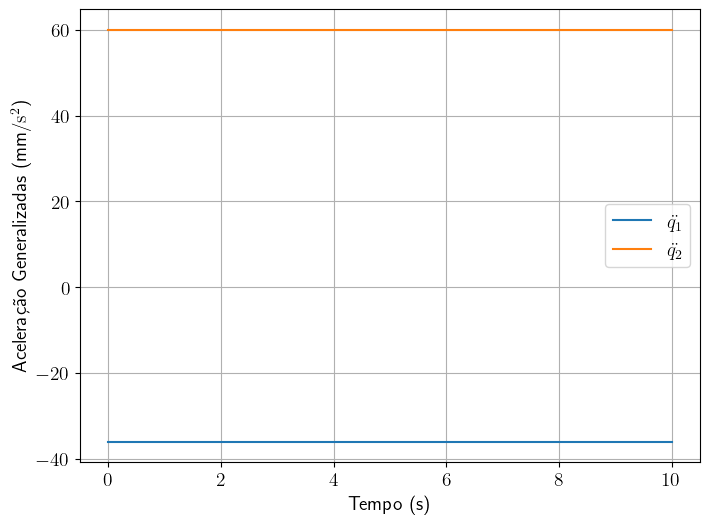

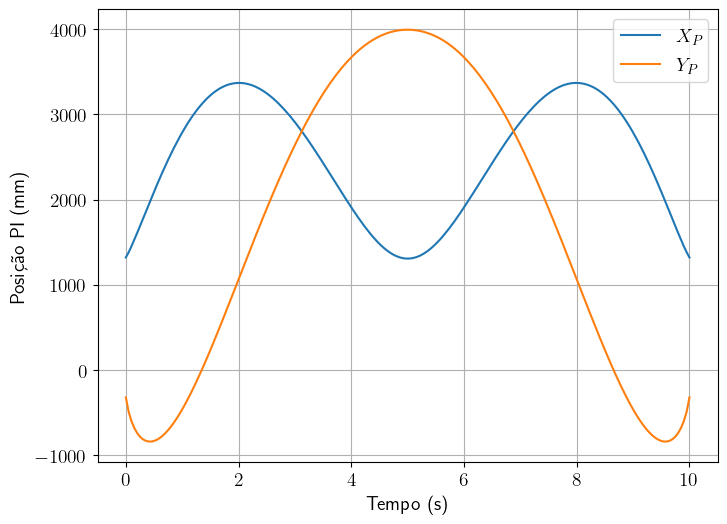

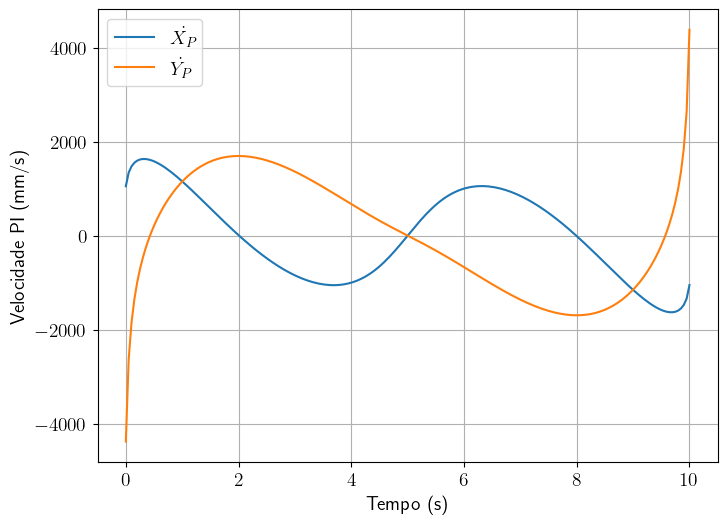

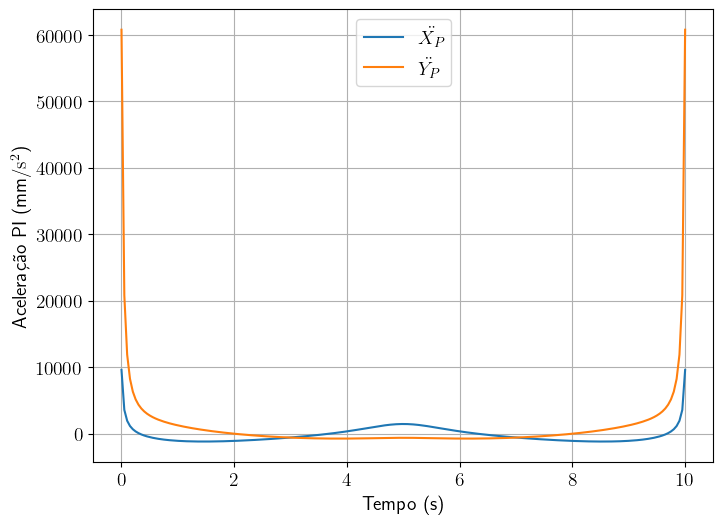

In [40]:
plotaesalvatudo(t,qv,qpv,qppv,S,Sp,Spp,P,Pp,Ppp,"quadratica")